## Unit 4 | Assignment - Pandas, Pandas, Pandas

## Background

The data dive continues!

## Option 1: Heroes of Pymoli

![Fantasy](../Images/Fantasy.jpg)

Congratulations! After a lot of hard work in the data munging mines, you've landed a job as Lead Analyst for an independent gaming company. You've been assigned the task of analyzing the data for their most recent fantasy game Heroes of Pymoli. 

Like many others in its genre, the game is free-to-play, but players are encouraged to purchase optional items that enhance their playing experience. As a first task, the company would like you to generate a report that breaks down the game's purchasing data into meaningful insights.

In [66]:
!pwd

/Users/pooya/Documents/DataScienceCource/homeworks/04-pandas/HeroesOfPymoli


In [67]:
import os
import json
import pandas as pd
import numpy as np

In [68]:
path = "./purchase_data.json"
#path = "./purchase_data2.json"

In [69]:
def topercent(num): return "{0:.2f}%".format(num*100)

In [70]:
with open(path, 'r') as file:
    purchase_data = pd.DataFrame(json.load(file))
purchase_data.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


Your final report should include each of the following:

**Player Count**

* Total Number of Players

In [71]:
players_count = purchase_data["SN"].unique().size
pd.DataFrame({"Total Number of Players" : [players_count]})

,Total Number of Players
0,573


**Purchasing Analysis (Total)**

* Number of Unique Items
* Average Purchase Price
* Total Number of Purchases
* Total Revenue

In [72]:
pd.DataFrame(
    {
        "Number of Unique Items" : [purchase_data["Item ID"].unique().size],
        "Average Purchase Price" : [purchase_data["Price"].mean()],
        "Total Number of Purchases" : [purchase_data["SN"].size],
        "Total Revenue" : [purchase_data["Price"].sum()]
    }
)

,Average Purchase Price,Number of Unique Items,Total Number of Purchases,Total Revenue
0,2.931192,183,780,2286.33


**Gender Demographics**

* Percentage and Count of Male Players
* Percentage and Count of Female Players
* Percentage and Count of Other / Non-Disclosed

In [73]:
# this is to remove duplicated players for cases when a player made multiple purchses
gender_stats = purchase_data[["Gender", "SN"]].groupby(["Gender","SN"]).count()
gender_stats["Count"] = 1
gender_stats = gender_stats.groupby(["Gender"]).count()
gender_stats["Count %"] = gender_stats["Count"] / gender_stats["Count"].sum() * 100
gender_stats.reset_index()

,Gender,Count,Count %
0,Female,100,17.452007
1,Male,465,81.151832
2,Other / Non-Disclosed,8,1.396161


**Purchasing Analysis (Gender)** 

* The below each broken by gender
  * Purchase Count
  * Average Purchase Price
  * Total Purchase Value
  * Normalized Totals

In [74]:
gender_purchase_analysis = purchase_data[["Gender", "Price"]].groupby(["Gender"]).agg(["count", "mean", "sum"])
gender_purchase_analysis.columns = ["Purchase Count", "Average Purchase Price", "Total Purchase Value"]
gender_purchase_analysis["Normalized Totals"] = gender_purchase_analysis["Total Purchase Value"] / gender_purchase_analysis["Total Purchase Value"].sum()
gender_purchase_analysis.reset_index()

,Gender,Purchase Count,Average Purchase Price,Total Purchase Value,Normalized Totals
0,Female,136,2.815515,382.91,0.167478
1,Male,633,2.950521,1867.68,0.816890
2,Other / Non-Disclosed,11,3.249091,35.74,0.015632


**Age Demographics**

* The below each broken into bins of 4 years (i.e. &lt;10, 10-14, 15-19, etc.) 
  * Purchase Count
  * Average Purchase Price
  * Total Purchase Value
  * Normalized Totals

In [75]:
age_bins = [0, 10, 14, 19, 200]
age_bins_names = ["<10", "10-14", "15-19", ">20"]
ages = np.array(purchase_data["Age"],dtype="int")
purchase_data["Age Tier"] = pd.cut(ages, age_bins, labels= age_bins_names)#
purchase_data.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age Tier
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34,>20
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46,>20
2,34,Male,174,Primitive Blade,2.46,Assastnya25,>20
3,21,Male,92,Final Critic,1.36,Pheusrical25,>20
4,23,Male,63,Stormfury Mace,1.27,Aela59,>20


In [76]:
age_groups = purchase_data[["Age Tier", "SN", "Price"]].groupby(["Age Tier"])
age_groups_stats = age_groups.agg({"Price" : ["count", "mean", "sum"]})
age_groups_stats.columns = ["Purchase Count", "Average Spent", "Total Spent"]
age_groups_stats["Normalized Totals"] = age_groups_stats["Total Spent"] / age_groups_stats["Total Spent"].sum()
age_groups_stats.reset_index()

,Age Tier,Purchase Count,Average Spent,Total Spent,Normalized Totals
0,<10,32,3.019375,96.62,0.042260
1,10-14,31,2.702903,83.79,0.036648
2,15-19,133,2.905414,386.42,0.169013
3,>20,584,2.944349,1719.50,0.752079


**Top Spenders**

* Identify the the top 5 spenders in the game by total purchase value, then list (in a table):
  * SN
  * Purchase Count
  * Average Purchase Price
  * Total Purchase Value

In [77]:
spent_total = purchase_data[["SN","Price"]].groupby(["SN"])
spent_total = spent_total.agg({"Price":["count", "mean", "sum"]})
spent_total.columns = ["Purchase Count", "Average Purchase Price", "Total Purchase Value"]
spent_total = spent_total.sort_values(by=[("Total Purchase Value")],ascending=False)[:5]
spent_total.reset_index()

,SN,Purchase Count,Average Purchase Price,Total Purchase Value
0,Undirrala66,5,3.412000,17.06
1,Saedue76,4,3.390000,13.56
2,Mindimnya67,4,3.185000,12.74
3,Haellysu29,3,4.243333,12.73
4,Eoda93,3,3.860000,11.58


**Most Popular Items**

* Identify the 5 most popular items by purchase count, then list (in a table):
  * Item ID
  * Item Name
  * Purchase Count
  * Item Price
  * Total Purchase Value

In [78]:
purchase_data.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age Tier
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34,>20
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46,>20
2,34,Male,174,Primitive Blade,2.46,Assastnya25,>20
3,21,Male,92,Final Critic,1.36,Pheusrical25,>20
4,23,Male,63,Stormfury Mace,1.27,Aela59,>20


In [79]:
most_popular = purchase_data[['Item ID', 'Item Name', 'Price']].groupby(['Item ID', 'Item Name', 'Price'])
most_popular = most_popular.agg({"Price":["sum", "count"]})
most_popular.columns = ["Total Purchase Value", "Purchase Count"]
most_popular.sort_values(by=[("Purchase Count")], ascending = False)[:5].reset_index()

,Item ID,Item Name,Price,Total Purchase Value,Purchase Count
0,39,"Betrayal, Whisper of Grieving Widows",2.35,25.85,11
1,84,Arcane Gem,2.23,24.53,11
2,31,Trickster,2.07,18.63,9
3,175,Woeful Adamantite Claymore,1.24,11.16,9
4,13,Serenity,1.49,13.41,9


**Most Profitable Items**

* Identify the 5 most profitable items by total purchase value, then list (in a table):
  * Item ID
  * Item Name
  * Purchase Count
  * Item Price
  * Total Purchase Value

In [80]:
most_popular.sort_values(by=[("Total Purchase Value")], ascending = False)[:5].reset_index()

,Item ID,Item Name,Price,Total Purchase Value,Purchase Count
0,34,Retribution Axe,4.14,37.26,9
1,115,Spectral Diamond Doomblade,4.25,29.75,7
2,32,Orenmir,4.95,29.70,6
3,103,Singed Scalpel,4.87,29.22,6
4,107,"Splitter, Foe Of Subtlety",3.61,28.88,8


As final considerations:

* Your script must work for both data-sets given.
* You must use the Pandas Library and the Jupyter Notebook.
* You must submit a link to your Jupyter Notebook with the viewable Data Frames. 
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* You must include a written description of three observable trends based on the data. 
* See [Example Solution](HeroesOfPymoli/HeroesOfPymoli_Example.pdf) for a reference on expected format. 

# Report
* Players are mostly male (more than 80%)
* Players are mostly ove 20 years old (mor than 70%)
* The number of purchases decreases in the extrimums of the price

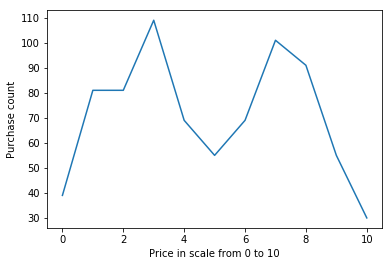

In [81]:
import matplotlib.pyplot as plt
import numpy as np

min = purchase_data[["Price"]].min()
max = purchase_data[["Price"]].max()
d = max - min
item_stats = round((purchase_data[["Price"]]-min) / d * 10)
item_stats["Purchase Count"] = 1
item_stats = item_stats.groupby("Price").count()
item_stats = item_stats.reset_index()
plt.xlabel("Price in scale from 0 to 10")
plt.ylabel("Purchase count")
plt.plot(item_stats["Price"], item_stats["Purchase Count"])
plt.show()